In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima.arima import auto_arima


In [3]:
df1 = pd.concat(map(pd.read_csv, glob.glob(r'C:\Users\Davide\Documents\H&S NBs\Data\*.csv')))
df = pd.DataFrame(df1, columns=['Date','Collins Place (North)'])

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.set_index('Date')

df = pd.to_numeric(df['Collins Place (North)'], errors='coerce')
df

ValueError: No objects to concatenate

In [3]:
df=df.groupby(pd.Grouper(freq='M')).sum()
df

Date
2015-01-31    203867
2015-02-28    243591
2015-03-31    258427
2015-04-30    240784
2015-05-31    245191
2015-06-30    239948
2015-07-31    267717
2015-08-31    247012
2015-09-30    246210
2015-10-31    259537
2015-11-30    232782
2015-12-31    235076
2016-01-31    207956
2016-02-29    261780
2016-03-31    255057
2016-04-30    257407
2016-05-31    278385
2016-06-30    255453
2016-07-31    260073
2016-08-31    280619
2016-09-30    265339
2016-10-31    261996
2016-11-30    266545
2016-12-31    230495
2017-01-31    217999
2017-02-28    255639
2017-03-31    282591
2017-04-30    232038
2017-05-31    290693
2017-06-30    271871
2017-07-31    258814
2017-08-31    280257
2017-09-30    247620
2017-10-31    270487
2017-11-30    263731
2017-12-31    220192
2018-01-31    221293
2018-02-28    256184
2018-03-31    256011
2018-04-30    237473
2018-05-31    267411
2018-06-30    211897
2018-07-31    247156
2018-08-31    270049
2018-09-30    240703
2018-10-31    276989
2018-11-30    258827
2018-12-

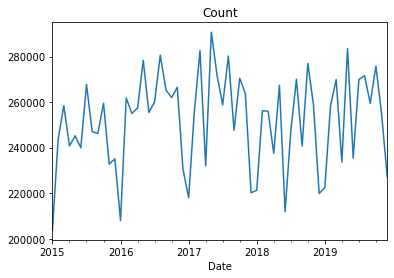

In [4]:
df.plot(title="Count")
plt.show()

In [5]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.018218025208928675, False)

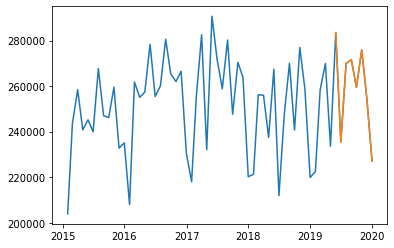

In [6]:
train = df[:80]
test = df[-8:]
plt.plot(train)
plt.plot(test)

In [7]:
arima_model = auto_arima(train, start_p=0, d=1, start_q=0,max_p=5, max_d=5, max_q=5, start_P=0,D=1, start_Q=0, max_P=5, max_D=5,max_Q=5,m=12,seasonal=True,error_action='warn',trace=True,supress_warnings=True, stepwise=True, random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1077.184, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1067.802, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1068.278, Time=0.06 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1071.635, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1067.763, Time=0.18 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1069.105, Time=0.27 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1068.894, Time=0.33 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1066.907, Time=0.14 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1066.467, Time=0.08 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1067.103, Time=0.17 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1068.892, Time=0.35 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1071.972, Time=0.12 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=1070.920, Time=0.09 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1070.314, Time=0.10 sec
 ARIMA(2,1,1)(0,1,1

In [8]:
prediction = pd.DataFrame(arima_model.predict(n_periods=8),index=test.index)
prediction.columns = ['predicted_count']
prediction

,predicted_count
Date,
2019-05-31,226263.897957
2019-06-30,262795.219819
2019-07-31,272655.830948
2019-08-31,239320.939674
2019-09-30,285690.512567
2019-10-31,237799.858471
2019-11-30,270274.599150
2019-12-31,276531.321111


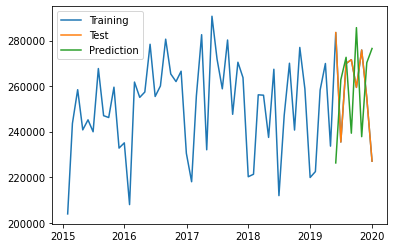

In [12]:
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(prediction, label='Prediction')
plt.legend(loc ='upper left')
plt.show()